# Das Rucksackproblem

Im Folgenden finden Sie das Rucksackproblem, das einerseits durch die sogenannte erschöpfende Suche (im Englischen Brute Force) und andererseits mit Hilfe dynamischer Optimierung gelöst wird. Zudem werden die Laufzeiten graphisch dargestellt. Dabei wird sowohl die Laufzeit für zunehmend größere Rucksäcke dargestellt, als auch für die Verwendung in den beiden genannten Methoden.

## Initialiserung notwendiger Variablen

Sowohl für die Test-Datenerstellung als auch für die graphische Darstellung sind die folgend definierten Variablen notwendig. Durch das Anpassen der globalen Variablen für die Testdaten-Erstellung wird sowohl die Anzahl der erzeugten Rucksäcke als auch deren Größe angepasst. Eine Anpassung der Daten sollte (wenn überhaupt) nur kleinschrittig erfolgen, da die Ausführung der erschöpfenden Suche sehr rechenintensiv ist.

Die Arrays für die graphische Darstellung enthalten je Methode die Anzahl der Objekte (x-Achse) und die Laufzeit (y-Achse).

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

"""Definition globaler Variablen"""
# Globale Variablen für die Testdaten-Erstellung
start = 16
stop = 26
step_size = 1

# Daten für die graphische Darstellung
time_knapsack_arr = []
objects_knapsack_arr = []

time_dynamic_arr = []
objects_dynamic_arr = []

## Erschöpfende Suche

Folgend ist die Lösung anhand der erschöpfenden Suche gegeben. Bei diesem Vorgehen werden alle Möglichkeiten ausprobiert und abschließend das Beste (maximale) zulässige Ergebnis zurückgegeben. Diese Methode ist sehr rechenintensiv, bringt jedoch ein optimales Ergebnis. Die Laufzeit steigt Exponentiell durch eine Zunahme des Rucksacks.

In [2]:
"""
Rucksackproblem mit erschöpfender Suche
 W =    Gesamtkapazität
 wt =   Gewichtsarray
 val =  Wertearray
 n =    Anzahl der Objekte
 """
def knapsack(W, wt, val, n):
    # Abbruchbedingung: Alle Objekte durchlaufen oder Kapazität ausgeschöpft
    if n == 0 or W == 0:
        return 0
    # Wenn das Gewicht des Objekts höher ist als die Kapazität, wird es nicht eingepackt
    if wt[n-1] > W:
        return knapsack(W, wt, val, n - 1)
    # Gibt das Maximum von zwei Fällen zurück:
    # 1. n-ter Eintrag enthalten
    # 2. nicht enthalten
    else:
        return max(val[n-1] + knapsack(W - wt[n - 1], wt, val, n - 1),
                   knapsack(W, wt, val, n - 1))

## Dynamische Programmierung

Bei diesem Ansatz wird das Optimum für alle Gewichts-Teilmengen berechnet. Durch das Speichern von Zwischenergebnissen werden redundante Berechnungen vermieden. Abschließend wird die optimale Lösung für die Gesamtkapazität zurückgegeben. Durch das Speichern von Zwischenergebnissen wird die Laufzeit enorm gesenkt. Man erhält eine lineare Laufzeit.

In [3]:
"""
Rucksackproblem mit dynamischer Programmierung
 W =    Gesamtkapazität
 wt =   Gewichtsarray
 val =  Wertearray
 n =    Anzahl der Objekte
 """
def knapsack_dynamic(W, wt, val, n):
    # Bauen des zweidimensionalen Arrays als Memory und füllen mit 0
    solution_table = [[0 for x in range(W + 1)] for x in range(n + 1)]

    # Durchlaufe alle Objekte
    for current_object in range(n + 1):
        # Durchlaufe alle möglichen Gewichts-Teilmengen
        for current_max_weight in range(W + 1):
            # Wenn aktuelles maximum = 0 (oder wir noch keine anderen Einträge zum vergleichen haben)
            if current_max_weight == 0 or current_object == 0:
                # Passt auch nichts in den Rucksack
                solution_table[current_object][current_max_weight] = 0
            # Wenn der aktuelle Gegenstand in den Rucksack passen würde, ...
            elif wt[current_object-1] <= current_max_weight:
                # Wird geprüft ob der aktuelle Gegenstand eine bessere Verteilung erzielen würde
                solution_table[current_object][current_max_weight] = \
                    max(
                        # Wert des aktuellen Objektes + *Bisheriges Optimum für restliche Kapazität*
                        val[current_object-1] + solution_table[current_object-1][current_max_weight-wt[current_object-1]],
                        # Bisheriges Optimum
                        solution_table[current_object-1][current_max_weight]
                    )
            # Gegenstand würde nicht in Rucksack passen
            else:
                # Verwende stattdessen bisheriges Maximum
                solution_table[current_object][current_max_weight] = solution_table[current_object-1][current_max_weight]
    # Gib untere rechte Ecke (= optimale Verteilung für gesamten Rucksack unter Berücksichtigung aller Objekte) zurück
    return solution_table[n][W]

## Funktionen zum Festhalten der Laufzeiten und Ausgabe relevanter Informationen

An dieser Stelle wird je Vorgehensweise eine Funktion definiert, welche die Laufzeit festhält und Angaben zum Rucksack wiedergibt.

In [4]:
"""
Funktion zum Festhalten der Laufzeit und zur Ausgabe relevanter Informationen für die erschöpfende Suche
 W =    Gesamtkapazität
 wt =   Gewichtsarray
 val =  Wertearray
 n =    Anzahl der Objekte
 """
def knapsack_time(W, wt, val, n):
    objects_knapsack_arr.append(n)
    start = time.time()
    optimum = knapsack(W, wt, val, n)
    end = time.time()
    time_knapsack_arr.append(end - start)

    print("Maximaler Wert:", optimum)
    print("Rucksackgröße:", W)
    print("Anzahl Objekte:", n)
    print("Laufzeit:", end - start, "Sekunden\n")


"""
Funktion zum Festhalten der Laufzeit und zur Ausgabe relevanter Informationen für die dynamische Programmierung
 W =    Gesamtkapazität
 wt =   Gewichtsarray
 val =  Wertearray
 n =    Anzahl der Objekte
 """
def knapsack_time_dynamic(W, wt, val, n):
    objects_dynamic_arr.append(n)
    start = time.time()
    optimum = knapsack_dynamic(W, wt, val, n)
    end = time.time()
    time_dynamic_arr.append(end - start)

    print("Maximaler Wert:", optimum)
    print("Rucksackgröße:", W)
    print("Anzahl Objekte:", n)
    print("Laufzeit:", end - start, "Sekunden\n")

## Erstellen der Testdaten und Anstoßen der Funktionen

An dieser Stelle folgt das Erstellen der Testdaten auf Basis der globalen Variablen, die anfangs erstellt wurden. Die Werte- und Gewichts-Arrays werden mit zufälligen Werten zwischen 1 und 40 initialisiert. Die Gesamtkapazität wird an dieser Stelle inital mit 160 angelegt und nimmt bei jedem Durchlauf um 10 zu (abhängig von globalen Variablen). Die Anzahl der Objekte nimmt je Durchlauf um 1 zu (abhängig von globalen Variablen).

In [5]:
"""Erstellen von Testdaten und Anstoßen der Funktionen"""
for size in range(start, stop, step_size):
    val = np.random.randint(1, 40, size)
    wt = np.random.randint(1, 40, size)
    W = size * 10
    n = len(val)
    print("Erschöpfende Suche")
    knapsack_time(W, wt, val, n)
    print("Dynamische Programmierung")
    knapsack_time_dynamic(W, wt, val, n)
    print("\n\n")

Erschöpfende Suche
Maximaler Wert: 234
Rucksackgröße: 160
Anzahl Objekte: 16
Laufzeit: 0.0370335578918457 Sekunden

Dynamische Programmierung
Maximaler Wert: 234
Rucksackgröße: 160
Anzahl Objekte: 16
Laufzeit: 0.0020020008087158203 Sekunden




Erschöpfende Suche
Maximaler Wert: 313
Rucksackgröße: 170
Anzahl Objekte: 17
Laufzeit: 0.07206535339355469 Sekunden

Dynamische Programmierung
Maximaler Wert: 313
Rucksackgröße: 170
Anzahl Objekte: 17
Laufzeit: 0.0010006427764892578 Sekunden




Erschöpfende Suche
Maximaler Wert: 291
Rucksackgröße: 180
Anzahl Objekte: 18
Laufzeit: 0.08507704734802246 Sekunden

Dynamische Programmierung
Maximaler Wert: 291
Rucksackgröße: 180
Anzahl Objekte: 18
Laufzeit: 0.001001119613647461 Sekunden




Erschöpfende Suche
Maximaler Wert: 300
Rucksackgröße: 190
Anzahl Objekte: 19
Laufzeit: 0.13412189483642578 Sekunden

Dynamische Programmierung
Maximaler Wert: 300
Rucksackgröße: 190
Anzahl Objekte: 19
Laufzeit: 0.0010008811950683594 Sekunden




Erschöpfende Suche

## Darstellung als Graph

An dieser Stelle werden die Ergebnisse graphisch dargestellt. Durch die Ergänzung der Ausgleichskurve kann der Verlauf besser nachvollzogen werden.

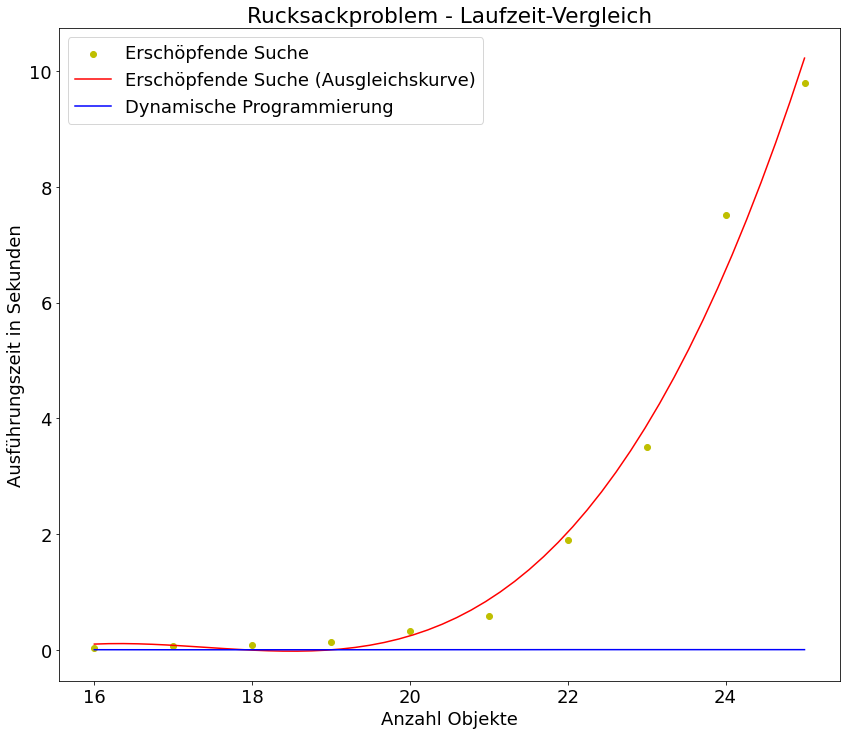

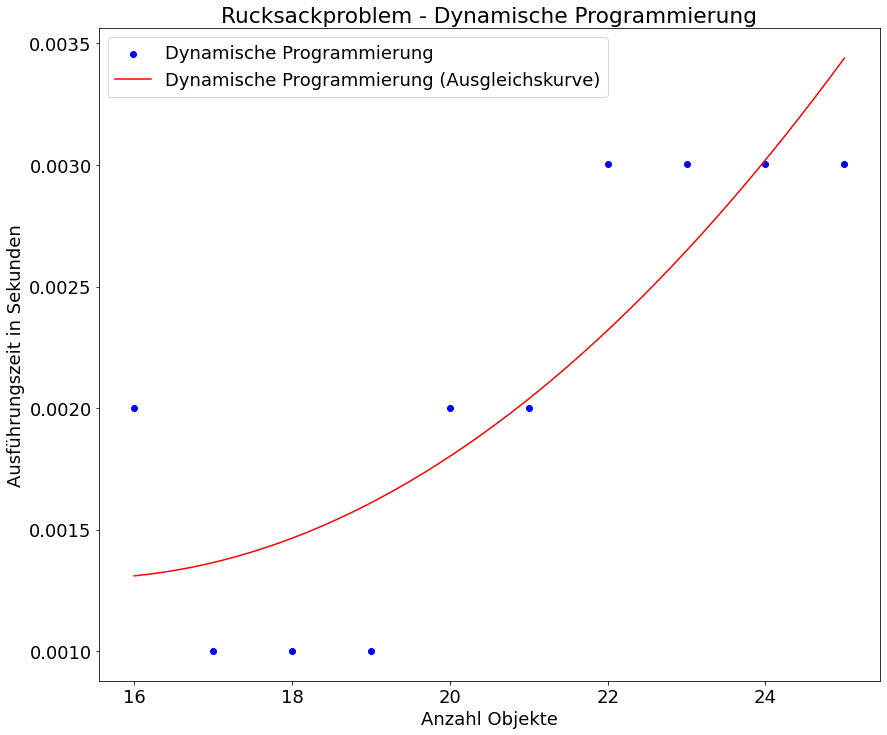

In [6]:
"""Änderung der Schriftgröße"""
plt.rc('font', size=18)

"""Erstellung Ausgleichskurve für die erschöpfende Suche"""
polynomialModel = np.poly1d(np.polyfit(objects_knapsack_arr, time_knapsack_arr, 3))
polyline = np.linspace(start, stop - 1, 50)

"""Erstellung des Graphen"""
plt.figure(figsize = (14, 12))
plt.scatter(objects_knapsack_arr, time_knapsack_arr, label="Erschöpfende Suche", color='y')
plt.plot(polyline, polynomialModel(polyline), label="Erschöpfende Suche (Ausgleichskurve)", color='r')
plt.plot(objects_dynamic_arr, time_dynamic_arr, label="Dynamische Programmierung", color='b')
plt.xlabel("Anzahl Objekte")
plt.ylabel("Ausführungszeit in Sekunden")
plt.title("Rucksackproblem - Laufzeit-Vergleich")
plt.legend()

"""Erstellung Ausgleichskurve für die dynamische Programmierung"""
polynomialModel = np.poly1d(np.polyfit(objects_dynamic_arr, time_dynamic_arr, 2))
polyline = np.linspace(start, stop - 1, 50)

"""Erstellung des Graphen für die dynamische Programmierung"""
plt.figure(figsize = (14, 12))
plt.scatter(objects_dynamic_arr, time_dynamic_arr, label="Dynamische Programmierung", color='b')
plt.plot(polyline, polynomialModel(polyline), label="Dynamische Programmierung (Ausgleichskurve)", color='r')
plt.xlabel("Anzahl Objekte")
plt.ylabel("Ausführungszeit in Sekunden")
plt.title("Rucksackproblem - Dynamische Programmierung")
plt.legend()